In [42]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (60000,)
(10000, 784) (10000,)


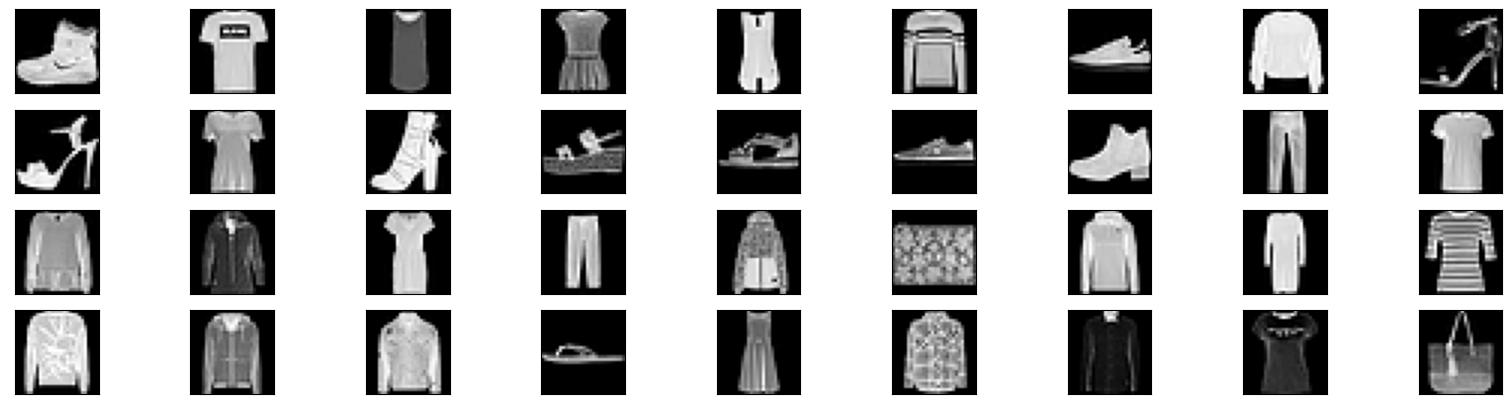

In [43]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(np.unique(y_train, return_counts = True)) 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)   

figure = plt.figure(figsize=(20,5))
for i in range(36):
    img = figure.add_subplot(4, 9, i+1, xticks=[], yticks=[])
    img.imshow(x_train[i], 'gray')       

# ---------- 전처리 (2차원으로 변환) ---------- #
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)  

x_test = x_test/255.0
x_train = x_train/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. 모델


In [44]:
model = Sequential()
model.add(Dense(units=64, input_shape=(28*28, ), activation='relu')) 
model.add(Dense(units=64, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=16, activation='relu')) 
model.add(Dense(units=10, activation='softmax')) 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                50240     
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dense_49 (Dense)            (None, 10)               

# 3. 컴파일 및 훈련

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras36_1_mnist.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=128, batch_size=256, validation_split=0.2, callbacks=[ES, MCP])

Epoch 1/128
188/188 [==============================] - 2s 6ms/step - loss: 1.1954 - acc: 0.5634 - val_loss: 0.5937 - val_acc: 0.8067
Epoch 2/128
188/188 [==============================] - 1s 5ms/step - loss: 0.6477 - acc: 0.7770 - val_loss: 0.4709 - val_acc: 0.8317
Epoch 3/128
188/188 [==============================] - 1s 5ms/step - loss: 0.5462 - acc: 0.8152 - val_loss: 0.4269 - val_acc: 0.8485
Epoch 4/128
188/188 [==============================] - 1s 5ms/step - loss: 0.4965 - acc: 0.8317 - val_loss: 0.4062 - val_acc: 0.8564
Epoch 5/128
188/188 [==============================] - 1s 5ms/step - loss: 0.4659 - acc: 0.8414 - val_loss: 0.4015 - val_acc: 0.8603
Epoch 6/128
188/188 [==============================] - 1s 6ms/step - loss: 0.4419 - acc: 0.8489 - val_loss: 0.3784 - val_acc: 0.8653
Epoch 7/128
188/188 [==============================] - 1s 6ms/step - loss: 0.4234 - acc: 0.8538 - val_loss: 0.3835 - val_acc: 0.8630
Epoch 8/128
188/188 [==============================] - 1s 6ms/step - 

# 4. 평가 및 예측

In [46]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4254 - acc: 0.8807
loss:  0.42543089389801025 acc:  0.8806999921798706
